<center><h1>Anne_Sai Venkata Naga Saketh_HW7</h1></center>

Name: Anne Sai Venkata Naga Saketh
<br>
Github Username: sakethanne
<br>
USC ID: 3725520208

I am using my initial 1 late days out of my 6 late days for this assignment

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [1]:
# Import statements that are required for this assignment
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

# Import statement for decision trees from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn.metrics import hamming_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Import statements for statmodels api
import statsmodels.api as sm

# Import statements for warnings, to ignore all the warnings
import warnings
warnings.filterwarnings("ignore")
import pprint

# Import statements for balancing the classification data set that is highly imbalanced
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from IPython.display import display
from PIL import Image

### (a) Download the Anuran Calls (MFCCs) Data Set

In [2]:
# Specifying the path to the dataset file containing MFCCs (Mel-Frequency Cepstral Coefficients) for frog calls
dataset_path = "../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv"

# Using the pandas read_csv function to read the dataset into a DataFrame (df)
df = pd.read_csv(dataset_path)

# Displaying the DataFrame, which shows the content of the dataset
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [3]:
# Extracting specific columns: 'Family', 'Genus', and 'Species'.
# These columns will be assigned to variables for further processing.
family = df['Family']
genus = df['Genus']
species = df['Species']

In [4]:
data_len = len(df)

# Seed the random number generator with the length of the dataframe
random.seed(data_len)

# Generate a list of indices from 0 to data_len-1
range_list = range(data_len)

# Calculate the number of indices to be used for training (70% of the data)
l = int(data_len * 0.7)

# Randomly sample 'l' indices from the range_list for training
train_indexes = random.sample(range_list, l)

# Initialize an empty list to store test indices
test_indexes = []

# Iterate through all indices and add those not in train_indexes to the test_indexes list
for i in range(data_len):
    if i not in train_indexes:
        test_indexes.append(i)

# Split the dataframe into training and testing sets using the selected indices
df_train = df.iloc[train_indexes, :].reset_index(drop=True)
df_test = df.iloc[test_indexes, :].reset_index(drop=True)

# Split the features and labels for the training set
X_train = df_train.iloc[:, :-4]
Family_train = df_train['Family']
Genus_train = df_train['Genus']
Species_train = df_train['Species']

# Split the features and labels for the testing set
X_test = df_test.iloc[:, :-4]
Family_test = df_test['Family']
Genus_test = df_test['Genus']
Species_test = df_test['Species']

In [5]:
print("The shape of the training dataframe")
print(df_train.shape)
print("\nThe shape of the testing dataframe")
print(df_test.shape)

The shape of the training dataframe
(5036, 26)

The shape of the testing dataframe
(2159, 26)


### (b) Train a classifier for each label

#### (i) Research

<b>Exact Match Ratio: </b><br>Definition: The exact match ratio measures the percentage of correctly predicted instances for all the labels. It checks whether all predicted labels for an instance exactly match the true labels.

<b> Hamming Loss: </b><br> Rather than treating a sample's labels as a single entity, this label-based statistic counts each individual miss-matched label.

#### (ii) Train a SVM for each of the labels

In [6]:
def multiClassMetrics(Y_gt, Y_pred):
    # Count the number of misclassified labels
    mis_classified_labels = 0
    for gt, pred in zip(Y_gt.values, Y_pred.values):
        w_clf = (gt != pred)
        mis_classified_labels += np.sum(w_clf)
    
    # Calculate Hamming Score (Loss)
    hamming_score = mis_classified_labels / (Y_gt.shape[0] * Y_gt.shape[1])
    
    # Calculate Exact Match Ratio
    e_r_score = 0
    for gt, pred in zip(Y_gt.values, Y_pred.values):
        c_clf = (gt == pred)
        if sum(c_clf) == Y_gt.shape[1]:
            e_r_score += 1
    e_r_score /= Y_gt.shape[0]
    
    # Round the scores to 6 decimal places
    hamming_score = np.round(hamming_score, 6)
    e_r_score = np.round(e_r_score, 6)
    
    # Store the results in a dictionary
    results = {
        "Hamming Score (Loss)": [hamming_score],
        "Exact Match Ratio": [e_r_score]
    }
    
    # Print the results as a DataFrame
    print(pd.DataFrame(data=results))
    
    # Return the calculated scores
    return hamming_score, e_r_score

In [7]:
def multiClassCalculations(name, X_test, Y_gt, c):
    # Initialize an empty DataFrame for predicted labels
    Y_pred = pd.DataFrame(columns=Y_gt.columns)
    
    # Iterate over each label and make predictions using the corresponding classifier
    for label in Y_gt.columns:
        clf = c[label]
        test_predictions = clf.predict(X_test)
        Y_pred.loc[:, label] = test_predictions
    
    # Print the evaluation results for the multilabel task
    print(f"Multilabel evaluation of {name} is as follows")
    h_score, e_r_score = multiClassMetrics(Y_gt, Y_pred)
    
    # Return the calculated scores
    return [h_score, e_r_score]

In [8]:
def Find_parameters(c, args, X_train, Y_train, X_test, Y_test):
    # Build and fit the grid search for the given classifier
    clf = GridSearchCV(estimator=c, **args)
    clf.fit(X_train, Y_train)
    
    # Print the GridSearch CV Scores
    print("GridSearch CV Scores are:\n")
    mean_score = clf.cv_results_['mean_test_score']
    std_score = clf.cv_results_['std_test_score']
    for mean, std, params in zip(mean_score, std_score, clf.cv_results_['params']):
        print(f"{round(mean, 6)} (+/-{round(std * 2, 6)}) for {params}")
    
    # Output the best parameter option
    print("\nParameter best suitable is:")
    print(clf.best_params_, "\n")
    
    # Evaluate the performance on the single-label task
    test_predictions = clf.predict(X_test)
    print(classification_report(Y_test, test_predictions))
    
    # Return the trained classifier
    return clf

In [9]:
# Gaussian Support Vector Classifier (SVC) without standardization
g_svc_c = {}

# Defining hyperparameter tuning parameters for GridSearchCV
tuned_params = {'C': np.logspace(1, 4, 4), 'gamma': np.logspace(-3, 6, 10)}

# Defining the cross-validation strategy using StratifiedKFold with 10 folds
splitter = StratifiedKFold(10, random_state=5036, shuffle=True)

# Additional parameters for GridSearchCV
kwargs = {
    'param_grid': tuned_params,
    'cv': splitter,
    'scoring': 'f1_weighted',
    'verbose': 1
}

In [10]:
# Print a message indicating the class being predicted and the classifier type
print(f"The Class we are predicting: `Family` (Gaussian SVC without Standardization)")

# The result is stored in the g_svc_c dictionary under the 'Family' key
g_svc_c['Family'] = Find_parameters(SVC(kernel='rbf'), kwargs, X_train, Family_train, X_test, Family_test)

The Class we are predicting: `Family` (Gaussian SVC without Standardization)
Fitting 10 folds for each of 40 candidates, totalling 400 fits
GridSearch CV Scores are:

0.868682 (+/-0.019078) for {'C': 10.0, 'gamma': 0.001}
0.925831 (+/-0.015975) for {'C': 10.0, 'gamma': 0.01}
0.970674 (+/-0.011899) for {'C': 10.0, 'gamma': 0.1}
0.991207 (+/-0.006599) for {'C': 10.0, 'gamma': 1.0}
0.985882 (+/-0.00969) for {'C': 10.0, 'gamma': 10.0}
0.79105 (+/-0.039703) for {'C': 10.0, 'gamma': 100.0}
0.491784 (+/-0.020638) for {'C': 10.0, 'gamma': 1000.0}
0.471779 (+/-0.004759) for {'C': 10.0, 'gamma': 10000.0}
0.469826 (+/-0.001917) for {'C': 10.0, 'gamma': 100000.0}
0.469826 (+/-0.001917) for {'C': 10.0, 'gamma': 1000000.0}
0.924919 (+/-0.01628) for {'C': 100.0, 'gamma': 0.001}
0.940215 (+/-0.020056) for {'C': 100.0, 'gamma': 0.01}
0.982156 (+/-0.007011) for {'C': 100.0, 'gamma': 0.1}
0.991654 (+/-0.007638) for {'C': 100.0, 'gamma': 1.0}
0.985882 (+/-0.00969) for {'C': 100.0, 'gamma': 10.0}
0.79105 (

In [11]:
# Print a message indicating the class being predicted and the classifier type
print(f"The Class we are predicting: `Genus` (Gaussian SVC without Standardization)")

# The result is stored in the g_svc_c dictionary under the 'Genus' key
g_svc_c['Genus'] = Find_parameters(SVC(kernel='rbf'), kwargs, X_train, Genus_train, X_test, Genus_test)

The Class we are predicting: `Genus` (Gaussian SVC without Standardization)
Fitting 10 folds for each of 40 candidates, totalling 400 fits
GridSearch CV Scores are:

0.743668 (+/-0.025864) for {'C': 10.0, 'gamma': 0.001}
0.919578 (+/-0.01853) for {'C': 10.0, 'gamma': 0.01}
0.973257 (+/-0.013808) for {'C': 10.0, 'gamma': 0.1}
0.98838 (+/-0.008589) for {'C': 10.0, 'gamma': 1.0}
0.979503 (+/-0.01052) for {'C': 10.0, 'gamma': 10.0}
0.732565 (+/-0.042338) for {'C': 10.0, 'gamma': 100.0}
0.442147 (+/-0.013933) for {'C': 10.0, 'gamma': 1000.0}
0.424791 (+/-0.003705) for {'C': 10.0, 'gamma': 10000.0}
0.423236 (+/-0.001346) for {'C': 10.0, 'gamma': 100000.0}
0.423236 (+/-0.001346) for {'C': 10.0, 'gamma': 1000000.0}
0.919149 (+/-0.016521) for {'C': 100.0, 'gamma': 0.001}
0.965068 (+/-0.016357) for {'C': 100.0, 'gamma': 0.01}
0.985287 (+/-0.008959) for {'C': 100.0, 'gamma': 0.1}
0.989465 (+/-0.007338) for {'C': 100.0, 'gamma': 1.0}
0.979503 (+/-0.01052) for {'C': 100.0, 'gamma': 10.0}
0.732565 (

In [12]:
# Print a message indicating the class being predicted and the classifier type
print(f"The Class we are predicting: `Species` (Gaussian SVC without Standardization)")

# The result is stored in the g_svc_c dictionary under the 'Species' key
g_svc_c['Species'] = Find_parameters(SVC(kernel='rbf'), kwargs, X_train, Species_train, X_test, Species_test)

The Class we are predicting: `Species` (Gaussian SVC without Standardization)
Fitting 10 folds for each of 40 candidates, totalling 400 fits
GridSearch CV Scores are:

0.799678 (+/-0.015296) for {'C': 10.0, 'gamma': 0.001}
0.934741 (+/-0.021365) for {'C': 10.0, 'gamma': 0.01}
0.974049 (+/-0.017464) for {'C': 10.0, 'gamma': 0.1}
0.987619 (+/-0.010856) for {'C': 10.0, 'gamma': 1.0}
0.977703 (+/-0.010034) for {'C': 10.0, 'gamma': 10.0}
0.656346 (+/-0.039843) for {'C': 10.0, 'gamma': 100.0}
0.329701 (+/-0.015003) for {'C': 10.0, 'gamma': 1000.0}
0.313746 (+/-0.004525) for {'C': 10.0, 'gamma': 10000.0}
0.311939 (+/-0.001017) for {'C': 10.0, 'gamma': 100000.0}
0.311939 (+/-0.001017) for {'C': 10.0, 'gamma': 1000000.0}
0.934943 (+/-0.020567) for {'C': 100.0, 'gamma': 0.001}
0.969957 (+/-0.018023) for {'C': 100.0, 'gamma': 0.01}
0.984633 (+/-0.018895) for {'C': 100.0, 'gamma': 0.1}
0.988243 (+/-0.010687) for {'C': 100.0, 'gamma': 1.0}
0.977703 (+/-0.010034) for {'C': 100.0, 'gamma': 10.0}
0.65

In [13]:
# Initialize a dictionary to store final evaluation results
final_results = {}

# Specify the label for the classifier
label = "Gaussian SVC without Standardization"

# The results include Hamming Score (Loss) and Exact Match Ratio
final_results[label] = multiClassCalculations(label, X_test, df_test.iloc[:, -4:-1], g_svc_c)

Multilabel evaluation of Gaussian SVC without Standardization is as follows
   Hamming Score (Loss)  Exact Match Ratio
0              0.009572           0.985178


In [14]:
# Print a message indicating the start of the standardization process
print("Standardizing the attributes")

# Instantiate a StandardScaler object
std_scaler = StandardScaler()

# Standardizing the features of the training set using fit_transform
std_X_train = std_scaler.fit_transform(X_train)

# Standardizing the features of the testing set using fit_transform
std_X_test = std_scaler.fit_transform(X_test)

Standardizing the attributes


In [15]:
g_svc_c_std = {}

# Print a message indicating the class being predicted and the classifier type
print(f"The Class we are predicting: `Family` (Gaussian SVC with Standardization)")

# The result is stored in the g_svc_c dictionary under the 'Family' key
g_svc_c_std['Family'] = Find_parameters(SVC(kernel='rbf'), kwargs, std_X_train, Family_train, std_X_test, Family_test)

The Class we are predicting: `Family` (Gaussian SVC with Standardization)
Fitting 10 folds for each of 40 candidates, totalling 400 fits
GridSearch CV Scores are:

0.943987 (+/-0.019717) for {'C': 10.0, 'gamma': 0.001}
0.987299 (+/-0.005033) for {'C': 10.0, 'gamma': 0.01}
0.990225 (+/-0.006827) for {'C': 10.0, 'gamma': 0.1}
0.905024 (+/-0.022725) for {'C': 10.0, 'gamma': 1.0}
0.574833 (+/-0.046588) for {'C': 10.0, 'gamma': 10.0}
0.473258 (+/-0.004181) for {'C': 10.0, 'gamma': 100.0}
0.469826 (+/-0.001917) for {'C': 10.0, 'gamma': 1000.0}
0.469826 (+/-0.001917) for {'C': 10.0, 'gamma': 10000.0}
0.469826 (+/-0.001917) for {'C': 10.0, 'gamma': 100000.0}
0.469826 (+/-0.001917) for {'C': 10.0, 'gamma': 1000000.0}
0.975078 (+/-0.012616) for {'C': 100.0, 'gamma': 0.001}
0.989121 (+/-0.006625) for {'C': 100.0, 'gamma': 0.01}
0.990225 (+/-0.006827) for {'C': 100.0, 'gamma': 0.1}
0.905024 (+/-0.022725) for {'C': 100.0, 'gamma': 1.0}
0.574833 (+/-0.046588) for {'C': 100.0, 'gamma': 10.0}
0.473258

In [16]:
# Print a message indicating the class being predicted and the classifier type
print(f"The Class we are predicting: `Genus` (Gaussian SVC with Standardization)")

# The result is stored in the g_svc_c dictionary under the 'Genus' key
g_svc_c_std['Genus'] = Find_parameters(SVC(kernel='rbf'), kwargs, std_X_train, Genus_train, std_X_test, Genus_test)

The Class we are predicting: `Genus` (Gaussian SVC with Standardization)
Fitting 10 folds for each of 40 candidates, totalling 400 fits
GridSearch CV Scores are:

0.957511 (+/-0.017535) for {'C': 10.0, 'gamma': 0.001}
0.986384 (+/-0.008448) for {'C': 10.0, 'gamma': 0.01}
0.986588 (+/-0.009285) for {'C': 10.0, 'gamma': 0.1}
0.856743 (+/-0.019956) for {'C': 10.0, 'gamma': 1.0}
0.513285 (+/-0.017902) for {'C': 10.0, 'gamma': 10.0}
0.426419 (+/-0.005501) for {'C': 10.0, 'gamma': 100.0}
0.423236 (+/-0.001346) for {'C': 10.0, 'gamma': 1000.0}
0.423236 (+/-0.001346) for {'C': 10.0, 'gamma': 10000.0}
0.423236 (+/-0.001346) for {'C': 10.0, 'gamma': 100000.0}
0.423236 (+/-0.001346) for {'C': 10.0, 'gamma': 1000000.0}
0.976576 (+/-0.012563) for {'C': 100.0, 'gamma': 0.001}
0.987551 (+/-0.007909) for {'C': 100.0, 'gamma': 0.01}
0.986588 (+/-0.009285) for {'C': 100.0, 'gamma': 0.1}
0.856743 (+/-0.019956) for {'C': 100.0, 'gamma': 1.0}
0.513285 (+/-0.017902) for {'C': 100.0, 'gamma': 10.0}
0.426419 

In [17]:
# Print a message indicating the class being predicted and the classifier type
print(f"The Class we are predicting: `Species` (Gaussian SVC with Standardization)")

# The result is stored in the g_svc_c dictionary under the 'Genus' key
g_svc_c_std['Species'] = Find_parameters(SVC(kernel='rbf'), kwargs, std_X_train, Species_train, std_X_test, Species_test)

The Class we are predicting: `Species` (Gaussian SVC with Standardization)
Fitting 10 folds for each of 40 candidates, totalling 400 fits
GridSearch CV Scores are:

0.966875 (+/-0.017995) for {'C': 10.0, 'gamma': 0.001}
0.986567 (+/-0.012514) for {'C': 10.0, 'gamma': 0.01}
0.984645 (+/-0.00817) for {'C': 10.0, 'gamma': 0.1}
0.834771 (+/-0.024268) for {'C': 10.0, 'gamma': 1.0}
0.38913 (+/-0.026209) for {'C': 10.0, 'gamma': 10.0}
0.314935 (+/-0.006459) for {'C': 10.0, 'gamma': 100.0}
0.311939 (+/-0.001017) for {'C': 10.0, 'gamma': 1000.0}
0.311939 (+/-0.001017) for {'C': 10.0, 'gamma': 10000.0}
0.311939 (+/-0.001017) for {'C': 10.0, 'gamma': 100000.0}
0.311939 (+/-0.001017) for {'C': 10.0, 'gamma': 1000000.0}
0.980219 (+/-0.014216) for {'C': 100.0, 'gamma': 0.001}
0.987437 (+/-0.012018) for {'C': 100.0, 'gamma': 0.01}
0.984645 (+/-0.00817) for {'C': 100.0, 'gamma': 0.1}
0.834771 (+/-0.024268) for {'C': 100.0, 'gamma': 1.0}
0.38913 (+/-0.026209) for {'C': 100.0, 'gamma': 10.0}
0.314935 (+

In [18]:
# Specify the label for the classifier
label = "Gaussian SVC with Standardization"

# The results include Hamming Score (Loss) and Exact Match Ratio
final_results[label] = multiClassCalculations(label, std_X_test, df_test.iloc[:, -4:-1], g_svc_c_std)

Multilabel evaluation of Gaussian SVC with Standardization is as follows
   Hamming Score (Loss)  Exact Match Ratio
0              0.011579           0.979157


Reported the combined results in Cell 38 after 1.(b).(iv)

#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [19]:
# Create a dictionary to store classifiers using L1-penalized linear SVM
L1_p_c_std = {}

# Define hyperparameter tuning parameters for GridSearchCV
tuned_params = {'C': np.logspace(1, 5, 10)}

# Define the cross-validation strategy using StratifiedKFold with 10 folds
splitter = StratifiedKFold(10, random_state=5036, shuffle=True)

# Additional parameters for GridSearchCV
kwargs = {
    'param_grid': tuned_params,
    'cv': splitter,
    'scoring': 'f1_weighted',
    'verbose': 1
}

In [20]:
# Print a message indicating the class being predicted and the classifier type
print(f"The Class we are predicting: `Family` (L1-penalized SVM with Standardization)")

# The result is stored in the L1_p_c_std dictionary under the 'Family' key
L1_p_c_std['Family'] = Find_parameters(LinearSVC(penalty='l1', dual=False), kwargs, std_X_train, Family_train, std_X_test, Family_test)

The Class we are predicting: `Family` (L1-penalized SVM with Standardization)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
GridSearch CV Scores are:

0.928207 (+/-0.026401) for {'C': 10.0}
0.928011 (+/-0.02661) for {'C': 27.825594022071243}
0.928011 (+/-0.02661) for {'C': 77.4263682681127}
0.928011 (+/-0.02661) for {'C': 215.44346900318823}
0.928011 (+/-0.02661) for {'C': 599.4842503189409}
0.928011 (+/-0.02661) for {'C': 1668.100537200059}
0.928011 (+/-0.02661) for {'C': 4641.588833612777}
0.928011 (+/-0.02661) for {'C': 12915.496650148827}
0.928011 (+/-0.02661) for {'C': 35938.13663804626}
0.928011 (+/-0.02661) for {'C': 100000.0}

Parameter best suitable is:
{'C': 10.0} 

                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        15
  Dendrobatidae       0.88      0.92      0.90       154
        Hylidae       0.94      0.90      0.92       673
Leptodactylidae       0.95      0.98      0.96      1317

       accu

In [21]:
# Print a message indicating the class being predicted and the classifier type
print(f"The Class we are predicting: `Genus` (L1-penalized SVM with Standardization)")

# The result is stored in the L1_p_c_std dictionary under the 'Genus' key
L1_p_c_std['Genus'] = Find_parameters(LinearSVC(penalty='l1', dual=False), kwargs, std_X_train, Genus_train, std_X_test, Genus_test)

The Class we are predicting: `Genus` (L1-penalized SVM with Standardization)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
GridSearch CV Scores are:

0.947811 (+/-0.012364) for {'C': 10.0}
0.947564 (+/-0.013389) for {'C': 27.825594022071243}
0.947835 (+/-0.012269) for {'C': 77.4263682681127}
0.947651 (+/-0.012043) for {'C': 215.44346900318823}
0.947458 (+/-0.012486) for {'C': 599.4842503189409}
0.947458 (+/-0.012486) for {'C': 1668.100537200059}
0.947458 (+/-0.012486) for {'C': 4641.588833612777}
0.947458 (+/-0.012486) for {'C': 12915.496650148827}
0.947458 (+/-0.012486) for {'C': 35938.13663804626}
0.947458 (+/-0.012486) for {'C': 100000.0}

Parameter best suitable is:
{'C': 77.4263682681127} 

               precision    recall  f1-score   support

    Adenomera       0.96      0.99      0.98      1240
     Ameerega       0.92      0.95      0.93       154
Dendropsophus       0.92      0.67      0.78        91
    Hypsiboas       0.92      0.98      0.95       479
Le

In [22]:
# Print a message indicating the class being predicted and the classifier type
print(f"The Class we are predicting: `Species` (L1-penalized SVM with Standardization)")

# The result is stored in the L1_p_c_std dictionary under the 'Species' key
L1_p_c_std['Species'] = Find_parameters(LinearSVC(penalty='l1', dual=False), kwargs, std_X_train, Species_train, std_X_test, Species_test)

The Class we are predicting: `Species` (L1-penalized SVM with Standardization)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
GridSearch CV Scores are:

0.958491 (+/-0.020682) for {'C': 10.0}
0.958684 (+/-0.02089) for {'C': 27.825594022071243}
0.958684 (+/-0.02089) for {'C': 77.4263682681127}
0.958684 (+/-0.02089) for {'C': 215.44346900318823}
0.958882 (+/-0.021621) for {'C': 599.4842503189409}
0.958882 (+/-0.021621) for {'C': 1668.100537200059}
0.958882 (+/-0.021621) for {'C': 4641.588833612777}
0.958882 (+/-0.021621) for {'C': 12915.496650148827}
0.958882 (+/-0.021621) for {'C': 35938.13663804626}
0.958882 (+/-0.021621) for {'C': 100000.0}

Parameter best suitable is:
{'C': 599.4842503189409} 

                        precision    recall  f1-score   support

        AdenomeraAndre       0.88      0.94      0.91       182
AdenomeraHylaedactylus       0.99      1.00      0.99      1058
    Ameeregatrivittata       0.94      0.94      0.94       154
            HylaMinut

In [23]:
# Specify the label for the classifier
label = "L1 Penalized SVM with Standardization"

# The results include Hamming Score (Loss) and Exact Match Ratio
final_results[label] = multiClassCalculations(label, std_X_test, df_test.iloc[:, -4:-1], L1_p_c_std)

Multilabel evaluation of L1 Penalized SVM with Standardization is as follows
   Hamming Score (Loss)  Exact Match Ratio
0              0.052185           0.914312


In [24]:
# Create a dictionary to store classifiers using L1-penalized linear SVM
L1_p_c = {}

# Print a message indicating the class being predicted and the classifier type
print(f"The Class we are predicting: `Family` (L1-penalized SVM without Standardization)")

# The result is stored in the L1_p_c_std dictionary under the 'Family' key
L1_p_c['Family'] = Find_parameters(LinearSVC(penalty='l1', dual=False), kwargs, X_train, Family_train, X_test, Family_test)

The Class we are predicting: `Family` (L1-penalized SVM without Standardization)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
GridSearch CV Scores are:

0.92755 (+/-0.027113) for {'C': 10.0}
0.928009 (+/-0.026611) for {'C': 27.825594022071243}
0.928009 (+/-0.026611) for {'C': 77.4263682681127}
0.928203 (+/-0.025851) for {'C': 215.44346900318823}
0.928203 (+/-0.025851) for {'C': 599.4842503189409}
0.928203 (+/-0.025851) for {'C': 1668.100537200059}
0.928203 (+/-0.025851) for {'C': 4641.588833612777}
0.928009 (+/-0.026611) for {'C': 12915.496650148827}
0.928009 (+/-0.026611) for {'C': 35938.13663804626}
0.928203 (+/-0.025851) for {'C': 100000.0}

Parameter best suitable is:
{'C': 215.44346900318823} 

                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        15
  Dendrobatidae       0.88      0.91      0.89       154
        Hylidae       0.94      0.90      0.92       673
Leptodactylidae       0.95      0.98      0.

In [25]:
# Print a message indicating the class being predicted and the classifier type
print(f"The Class we are predicting: `Genus` (L1-penalized SVM without Standardization)")

# The result is stored in the L1_p_c_std dictionary under the 'Genus' key
L1_p_c['Genus'] = Find_parameters(LinearSVC(penalty='l1', dual=False), kwargs, X_train, Genus_train, X_test, Genus_test)

The Class we are predicting: `Genus` (L1-penalized SVM without Standardization)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
GridSearch CV Scores are:

0.945628 (+/-0.015724) for {'C': 10.0}
0.946779 (+/-0.013822) for {'C': 27.825594022071243}
0.948148 (+/-0.011839) for {'C': 77.4263682681127}
0.947557 (+/-0.012311) for {'C': 215.44346900318823}
0.947573 (+/-0.012262) for {'C': 599.4842503189409}
0.947573 (+/-0.012262) for {'C': 1668.100537200059}
0.947374 (+/-0.012911) for {'C': 4641.588833612777}
0.947335 (+/-0.013047) for {'C': 12915.496650148827}
0.947573 (+/-0.012262) for {'C': 35938.13663804626}
0.947573 (+/-0.012262) for {'C': 100000.0}

Parameter best suitable is:
{'C': 77.4263682681127} 

               precision    recall  f1-score   support

    Adenomera       0.96      0.99      0.98      1240
     Ameerega       0.94      0.95      0.94       154
Dendropsophus       0.92      0.64      0.75        91
    Hypsiboas       0.91      0.98      0.94       479

In [26]:
# Print a message indicating the class being predicted and the classifier type
print(f"The Class we are predicting: `Species` (L1-penalized SVM without Standardization)")

# The result is stored in the L1_p_c_std dictionary under the 'Species' key
L1_p_c['Species'] = Find_parameters(LinearSVC(penalty='l1', dual=False), kwargs, X_train, Species_train, X_test, Species_test)

The Class we are predicting: `Species` (L1-penalized SVM without Standardization)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
GridSearch CV Scores are:

0.958483 (+/-0.018396) for {'C': 10.0}
0.958866 (+/-0.020244) for {'C': 27.825594022071243}
0.958759 (+/-0.020784) for {'C': 77.4263682681127}
0.958889 (+/-0.021094) for {'C': 215.44346900318823}
0.959287 (+/-0.021303) for {'C': 599.4842503189409}
0.959086 (+/-0.020704) for {'C': 1668.100537200059}
0.959082 (+/-0.021515) for {'C': 4641.588833612777}
0.959082 (+/-0.021515) for {'C': 12915.496650148827}
0.959082 (+/-0.021515) for {'C': 35938.13663804626}
0.959082 (+/-0.021515) for {'C': 100000.0}

Parameter best suitable is:
{'C': 599.4842503189409} 

                        precision    recall  f1-score   support

        AdenomeraAndre       0.90      0.93      0.92       182
AdenomeraHylaedactylus       0.98      1.00      0.99      1058
    Ameeregatrivittata       0.94      0.95      0.94       154
            Hyl

In [27]:
# Specify the label for the classifier
label = "L1 Penalized SVM without Standardization"

# The results include Hamming Score (Loss) and Exact Match Ratio
final_results[label] = multiClassCalculations(label, X_test, df_test.iloc[:, -4:-1], L1_p_c)

Multilabel evaluation of L1 Penalized SVM without Standardization is as follows
   Hamming Score (Loss)  Exact Match Ratio
0              0.054192           0.911996


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [28]:
# Creating a pipeline with SMOTE (Synthetic Minority Over-sampling Technique) and the specified classifier
def smote_Find_Parameters(c, args, X_train, Y_train, X_test, Y_test):
    # This pipeline is designed to address class imbalance by oversampling the minority class
    act = Pipeline([('sampling', SMOTE()), ('classification', c)])
    
    # Using the Find_Parameters function to perform hyperparameter tuning on the pipeline
    bestmodel = Find_parameters(act, args, X_train, Y_train, X_test, Y_test)
    
    # Returning the best model obtained after hyperparameter tuning
    return bestmodel

In [29]:
# Create a dictionary to store classifiers using SMOTE
smote_c_std = {}

# Define hyperparameter tuning parameters for GridSearchCV
tuned_params = {'classification__C' : np.logspace(1, 5, 10)}

# Define the cross-validation strategy using StratifiedKFold with 10 folds
splitter = StratifiedKFold(10, random_state=5036, shuffle=True)

# Additional parameters for GridSearchCV
kwargs = {'param_grid' : tuned_params, 'cv' : splitter,'scoring' : 'f1_weighted', 'verbose' : 1}

In [30]:
# Print a message indicating the class being predicted and the classifier type
print(f"The Class we are predicting: `Family` (L1-penalized and SMOTE with Standardization)")

# The result is stored in the L1_p_c_std dictionary under the 'Family' key
smote_c_std['Family'] = smote_Find_Parameters(LinearSVC(penalty='l1', dual=False), kwargs, std_X_train, Family_train, std_X_test, Family_test)

The Class we are predicting: `Family` (L1-penalized and SMOTE with Standardization)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
GridSearch CV Scores are:

0.920158 (+/-0.02696) for {'classification__C': 10.0}
0.920514 (+/-0.024289) for {'classification__C': 27.825594022071243}
0.921593 (+/-0.022364) for {'classification__C': 77.4263682681127}
0.91948 (+/-0.024366) for {'classification__C': 215.44346900318823}
0.921701 (+/-0.023635) for {'classification__C': 599.4842503189409}
0.921566 (+/-0.024325) for {'classification__C': 1668.100537200059}
0.919527 (+/-0.026121) for {'classification__C': 4641.588833612777}
0.918538 (+/-0.027489) for {'classification__C': 12915.496650148827}
0.919296 (+/-0.024349) for {'classification__C': 35938.13663804626}
0.921925 (+/-0.022221) for {'classification__C': 100000.0}

Parameter best suitable is:
{'classification__C': 100000.0} 

                 precision    recall  f1-score   support

      Bufonidae       0.23      1.00      0.38 

In [31]:
# Print a message indicating the class being predicted and the classifier type
print(f"The Class we are predicting: `Genus` (L1-penalized and SMOTE with Standardization)")

# The result is stored in the L1_p_c_std dictionary under the 'Genus' key
smote_c_std['Genus'] = smote_Find_Parameters(LinearSVC(penalty='l1', dual=False), kwargs, std_X_train, Genus_train, std_X_test, Genus_test)

The Class we are predicting: `Genus` (L1-penalized and SMOTE with Standardization)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
GridSearch CV Scores are:

0.917539 (+/-0.023489) for {'classification__C': 10.0}
0.918627 (+/-0.024391) for {'classification__C': 27.825594022071243}
0.918117 (+/-0.026785) for {'classification__C': 77.4263682681127}
0.918104 (+/-0.0242) for {'classification__C': 215.44346900318823}
0.917868 (+/-0.022622) for {'classification__C': 599.4842503189409}
0.918906 (+/-0.022188) for {'classification__C': 1668.100537200059}
0.916891 (+/-0.023722) for {'classification__C': 4641.588833612777}
0.918196 (+/-0.022746) for {'classification__C': 12915.496650148827}
0.917217 (+/-0.024487) for {'classification__C': 35938.13663804626}
0.917599 (+/-0.021889) for {'classification__C': 100000.0}

Parameter best suitable is:
{'classification__C': 1668.100537200059} 

               precision    recall  f1-score   support

    Adenomera       0.99      0.91      0

In [32]:
# Print a message indicating the class being predicted and the classifier type
print(f"The Class we are predicting: `Species` (L1-penalized and SMOTE with Standardization)")

# The result is stored in the L1_p_c_std dictionary under the 'Species' key
smote_c_std['Species'] = smote_Find_Parameters(LinearSVC(penalty='l1', dual=False), kwargs, std_X_train, Species_train, std_X_test, Species_test)

The Class we are predicting: `Species` (L1-penalized and SMOTE with Standardization)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
GridSearch CV Scores are:

0.959361 (+/-0.017824) for {'classification__C': 10.0}
0.957124 (+/-0.015309) for {'classification__C': 27.825594022071243}
0.959243 (+/-0.01717) for {'classification__C': 77.4263682681127}
0.954914 (+/-0.017144) for {'classification__C': 215.44346900318823}
0.956741 (+/-0.016192) for {'classification__C': 599.4842503189409}
0.95559 (+/-0.01733) for {'classification__C': 1668.100537200059}
0.957195 (+/-0.015046) for {'classification__C': 4641.588833612777}
0.957023 (+/-0.016324) for {'classification__C': 12915.496650148827}
0.957808 (+/-0.019341) for {'classification__C': 35938.13663804626}
0.957735 (+/-0.019758) for {'classification__C': 100000.0}

Parameter best suitable is:
{'classification__C': 10.0} 

                        precision    recall  f1-score   support

        AdenomeraAndre       0.95      0.93 

In [33]:
# Specify the label for the classifier
label = 'SVM with L1 penalty and SMOTE with Standardization'

# The results include Hamming Score (Loss) and Exact Match Ratio
final_results[label] = multiClassCalculations(label, std_X_test, df_test.iloc[:, -4:-1], smote_c_std)

Multilabel evaluation of SVM with L1 penalty and SMOTE with Standardization is as follows
   Hamming Score (Loss)  Exact Match Ratio
0              0.071175           0.857805


In [34]:
# Create a dictionary to store classifiers using SMOTE
smote_c = {}

# Print a message indicating the class being predicted and the classifier type
print(f"The Class we are predicting: `Family` (L1-penalized and SMOTE without Standardization)")

# The result is stored in the L1_p_c_std dictionary under the 'Family' key
smote_c['Family'] = smote_Find_Parameters(LinearSVC(penalty='l1', dual=False), kwargs, X_train, Family_train, X_test, Family_test)

The Class we are predicting: `Family` (L1-penalized and SMOTE without Standardization)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
GridSearch CV Scores are:

0.920913 (+/-0.025498) for {'classification__C': 10.0}
0.920831 (+/-0.022476) for {'classification__C': 27.825594022071243}
0.91933 (+/-0.026159) for {'classification__C': 77.4263682681127}
0.921068 (+/-0.026977) for {'classification__C': 215.44346900318823}
0.919853 (+/-0.026527) for {'classification__C': 599.4842503189409}
0.921507 (+/-0.02402) for {'classification__C': 1668.100537200059}
0.921987 (+/-0.023329) for {'classification__C': 4641.588833612777}
0.920661 (+/-0.021924) for {'classification__C': 12915.496650148827}
0.919603 (+/-0.024969) for {'classification__C': 35938.13663804626}
0.922066 (+/-0.025211) for {'classification__C': 100000.0}

Parameter best suitable is:
{'classification__C': 100000.0} 

                 precision    recall  f1-score   support

      Bufonidae       0.25      0.93      0.

In [35]:
# Print a message indicating the class being predicted and the classifier type
print(f"The Class we are predicting: `Genus` (L1-penalized and SMOTE without Standardization)")

# The result is stored in the L1_p_c_std dictionary under the 'Genus' key
smote_c['Genus'] = smote_Find_Parameters(LinearSVC(penalty='l1', dual=False), kwargs, X_train, Genus_train, X_test, Genus_test)

The Class we are predicting: `Genus` (L1-penalized and SMOTE without Standardization)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
GridSearch CV Scores are:

0.918423 (+/-0.021517) for {'classification__C': 10.0}
0.91763 (+/-0.020072) for {'classification__C': 27.825594022071243}
0.918512 (+/-0.021054) for {'classification__C': 77.4263682681127}
0.919266 (+/-0.02359) for {'classification__C': 215.44346900318823}
0.917892 (+/-0.021271) for {'classification__C': 599.4842503189409}
0.919257 (+/-0.024452) for {'classification__C': 1668.100537200059}
0.91761 (+/-0.024497) for {'classification__C': 4641.588833612777}
0.917768 (+/-0.021308) for {'classification__C': 12915.496650148827}
0.918235 (+/-0.025976) for {'classification__C': 35938.13663804626}
0.917735 (+/-0.021493) for {'classification__C': 100000.0}

Parameter best suitable is:
{'classification__C': 215.44346900318823} 

               precision    recall  f1-score   support

    Adenomera       0.98      0.93    

In [36]:
# Print a message indicating the class being predicted and the classifier type
print(f"The Class we are predicting: `Species` (L1-penalized and SMOTE without Standardization)")

# The result is stored in the L1_p_c_std dictionary under the 'Species' key
smote_c['Species'] = smote_Find_Parameters(LinearSVC(penalty='l1', dual=False), kwargs, X_train, Species_train, X_test, Species_test)

The Class we are predicting: `Species` (L1-penalized and SMOTE without Standardization)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
GridSearch CV Scores are:

0.957596 (+/-0.016177) for {'classification__C': 10.0}
0.957471 (+/-0.01384) for {'classification__C': 27.825594022071243}
0.957277 (+/-0.014932) for {'classification__C': 77.4263682681127}
0.957765 (+/-0.014507) for {'classification__C': 215.44346900318823}
0.957951 (+/-0.015942) for {'classification__C': 599.4842503189409}
0.957443 (+/-0.015835) for {'classification__C': 1668.100537200059}
0.957493 (+/-0.015828) for {'classification__C': 4641.588833612777}
0.957878 (+/-0.01294) for {'classification__C': 12915.496650148827}
0.957349 (+/-0.01527) for {'classification__C': 35938.13663804626}
0.956678 (+/-0.016452) for {'classification__C': 100000.0}

Parameter best suitable is:
{'classification__C': 599.4842503189409} 

                        precision    recall  f1-score   support

        AdenomeraAndre      

In [37]:
# Specify the label for the classifier
label = 'SVM with L1 penalty and SMOTE without Standardization'

# The results include Hamming Score (Loss) and Exact Match Ratio
final_results[label] = multiClassCalculations(label, X_test, df_test.iloc[:, -4:-1], smote_c)

Multilabel evaluation of SVM with L1 penalty and SMOTE without Standardization is as follows
   Hamming Score (Loss)  Exact Match Ratio
0              0.066698             0.8717


In [38]:
# Converting the dictionary into a dataframe and printing it
final_results_df = pd.DataFrame(data=final_results)
final_results_df

,Gaussian SVC without Standardization,Gaussian SVC with Standardization,L1 Penalized SVM with Standardization,L1 Penalized SVM without Standardization,SVM with L1 penalty and SMOTE with Standardization,SVM with L1 penalty and SMOTE without Standardization
0,0.009572,0.011579,0.052185,0.054192,0.071175,0.066698
1,0.985178,0.979157,0.914312,0.911996,0.857805,0.871700


## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

### (b) Determine which family is the majority

In [39]:
# A Function to get the best value of k from the given set.
def extract_best_k(cl, X, r):
    # Initialize variables to store the best values of k and silhouette score
    best_K, best_s = 2, 0
    
    # Increment the maximum value of k by 1 for the loop range
    cl = cl + 1
    
    # Iterate over a range of values for k (from 2 to cl-1)
    for n in range(2, cl):
        # Create a KMeans clustering algorithm with n clusters
        cl_alg = KMeans(n_clusters=n, random_state=r)
        
        # Fit the algorithm to the data and obtain cluster labels
        cl_label = cl_alg.fit_predict(X)
        
        # Calculate the average silhouette score for the clustering
        s_avg = silhouette_score(X, cl_label)
        
        # Update the best values if the current silhouette score is higher
        if s_avg > best_s:
            best_K = n
            best_s = s_avg
    
    # Print the best value of K selected
    print(f"\nThe Best Value of K selected is: {best_K}")
    
    # Return the best value of K
    return best_K

In [40]:
# A Function to get majority labels of a cluster
def extract_major_labels(best_K, cl_label, Y):
    # Initialize an empty DataFrame to store majority labels for each cluster
    cl_m = pd.DataFrame(columns=Y.columns)
    
    # Iterate over each cluster index
    for c in range(best_K):
        # Find the indices of instances assigned to the current cluster
        indexes, = np.where(cl_label == c)
        
        # Extract the subset of true labels corresponding to the current cluster
        cl_sample = Y.iloc[indexes, :]
        
        # Initialize a list to store majority labels for each label in Y
        row = []
        
        # Iterate over labels in Y
        for label in Y.columns:
            # Find the most frequent label in the current cluster
            present_m = cl_sample.loc[:, label].value_counts().index[0]
            row.append(present_m)
        
        # Append the row of majority labels for the current cluster to the DataFrame
        cl_m.loc[c] = row
    
    # Return the DataFrame containing majority labels for each cluster
    return cl_m

In [41]:
# A Function to compute the hamming loss and hamming distance
def c_hamming_loss(cl_m, cl_label, Y):
    # Initialize a variable to store the total number of misclassifications
    w_clfs = 0
    
    # Iterate over each cluster index
    for c in range(len(cl_m)):
        # Find the indices of instances assigned to the current cluster
        indexes, = np.where(cl_label == c)
        
        # Iterate over labels of instances in the current cluster
        for label in Y.loc[indexes].values:
            # Check for misclassifications and sum the count of wrong predictions
            wrong = (label != cl_m.loc[c].values)
            w_clfs += np.sum(wrong)
    
    # Calculate Hamming Distance (fraction of misclassified labels)
    hamming_distance = w_clfs / Y.shape[0]
    
    # Calculate Hamming Loss (fraction of misclassified labels per label)
    hamming_loss = w_clfs / (Y.shape[0] * Y.shape[1])
    
    # Return the computed Hamming Distance and Hamming Loss
    return hamming_distance, hamming_loss

In [42]:
def simulation_monte_carlo(iterations, X, Y):
    # Initialize arrays to store Hamming Distance and Hamming Loss for each iteration
    hamming_distance_arr = []
    hamming_loss_arr = []

    # Iterate over the specified number of Monte Carlo simulations
    for i in range(iterations):
        # Obtain the best value of K for KMeans clustering using silhouette score
        best_K = extract_best_k(50, X, i)
        
        # Apply KMeans clustering with the best value of K
        cl_alg = KMeans(n_clusters=best_K, random_state=i)
        cl_label = cl_alg.fit_predict(X)
        
        # Extract majority labels for each cluster
        cl_m = extract_major_labels(best_K, cl_label, Y)
        print(f"The mojar cluster label is: \n{cl_m}\n")
        
        # Compute Hamming Distance and Hamming Loss
        present_distance, present_loss = c_hamming_loss(cl_m, cl_label, Y)
        
        # Append the results to the arrays
        hamming_distance_arr.append(present_distance)
        hamming_loss_arr.append(present_loss)
        
        # Print the results for the current iteration
        print(f"Loop iteration {i + 1} times | The Hamming Distance is : {round(present_distance, 6)} | The Hamming Loss is: {round(present_loss, 6)}")
    
    # Return arrays containing Hamming Distance and Hamming Loss for each iteration
    return hamming_distance_arr, hamming_loss_arr

In [43]:
iterations = 50

# Invoking the above monte carlo simulation function on the complete dataset without splitting it
hamming_distance, hamming_loss = simulation_monte_carlo(iterations, df.iloc[:, :-4], df.iloc[:, -4:-1])


The Best Value of K selected is: 4
The mojar cluster label is: 
            Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1    Dendrobatidae   Ameerega      Ameeregatrivittata
2          Hylidae  Hypsiboas    HypsiboasCinerascens
3          Hylidae  Hypsiboas       HypsiboasCordobae

Loop iteration 1 times | The Hamming Distance is : 0.665323 | The Hamming Loss is: 0.221774

The Best Value of K selected is: 4
The mojar cluster label is: 
            Family      Genus                 Species
0          Hylidae  Hypsiboas    HypsiboasCinerascens
1    Dendrobatidae   Ameerega      Ameeregatrivittata
2  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
3          Hylidae  Hypsiboas       HypsiboasCordobae

Loop iteration 2 times | The Hamming Distance is : 0.667269 | The Hamming Loss is: 0.222423

The Best Value of K selected is: 4
The mojar cluster label is: 
            Family      Genus                 Species
0          Hylidae  Hypsi


The Best Value of K selected is: 4
The mojar cluster label is: 
            Family      Genus                 Species
0          Hylidae  Hypsiboas       HypsiboasCordobae
1  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2          Hylidae  Hypsiboas    HypsiboasCinerascens
3  Leptodactylidae  Adenomera          AdenomeraAndre

Loop iteration 21 times | The Hamming Distance is : 0.702154 | The Hamming Loss is: 0.234051

The Best Value of K selected is: 4
The mojar cluster label is: 
            Family      Genus                 Species
0    Dendrobatidae   Ameerega      Ameeregatrivittata
1          Hylidae  Hypsiboas       HypsiboasCordobae
2  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
3          Hylidae  Hypsiboas    HypsiboasCinerascens

Loop iteration 22 times | The Hamming Distance is : 0.667269 | The Hamming Loss is: 0.222423

The Best Value of K selected is: 4
The mojar cluster label is: 
            Family      Genus                 Species
0  Leptodactylidae  Ade


The Best Value of K selected is: 4
The mojar cluster label is: 
            Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1          Hylidae  Hypsiboas       HypsiboasCordobae
2          Hylidae  Hypsiboas    HypsiboasCinerascens
3    Dendrobatidae   Ameerega      Ameeregatrivittata

Loop iteration 41 times | The Hamming Distance is : 0.667269 | The Hamming Loss is: 0.222423

The Best Value of K selected is: 4
The mojar cluster label is: 
            Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1          Hylidae  Hypsiboas       HypsiboasCordobae
2          Hylidae  Hypsiboas    HypsiboasCinerascens
3    Dendrobatidae   Ameerega      Ameeregatrivittata

Loop iteration 42 times | The Hamming Distance is : 0.667269 | The Hamming Loss is: 0.222423

The Best Value of K selected is: 4
The mojar cluster label is: 
            Family      Genus                 Species
0  Leptodactylidae  Ade

### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [44]:
def finalise(hamming_distance, hamming_loss):
    # Calculate the mean and standard deviation of Hamming Distance
    final_hamming_dist = {
        "Mean Hamming Distance": [round(np.mean(hamming_distance), 6)],
        "Standard Deviation of Hamming Distance": [round(np.std(hamming_distance), 6)]
    }
    
    # Calculate the mean and standard deviation of Hamming Loss
    final_hamming_loss = {
        "Mean Hamming Loss": [round(np.mean(hamming_loss), 6)],
        "Standard Deviation of Hamming Loss": [round(np.std(hamming_loss), 6)]
    }
    
    # Calculate the mean and standard deviation of Hamming Score
    final_h_score = {
        "Mean Hamming Score": [round(1 - np.mean(hamming_loss), 6)],
        "Standard Deviation of Hamming Score": [round(np.std(hamming_loss), 6)]
    }
    
    # Create DataFrames for the final results
    final_hd_df = pd.DataFrame(data=final_hamming_dist)
    final_hl_df = pd.DataFrame(data=final_hamming_loss)
    final_h_score_df = pd.DataFrame(data=final_h_score)
    
    # Return a list containing the DataFrames for Hamming Distance, Hamming Loss, and Hamming Score
    return [final_hd_df, final_hl_df, final_h_score_df]

In [45]:
# Invoking the above function to get the required values
final_hd_df, final_hl_df, final_h_score_df = finalise(hamming_distance, hamming_loss)

In [46]:
# Printing the Final Hamming Distance values
final_hd_df

,Mean Hamming Distance,Standard Deviation of Hamming Distance
0,0.671169,0.03102


In [47]:
# Printing the Final Hamming Loss values
final_hl_df

,Mean Hamming Loss,Standard Deviation of Hamming Loss
0,0.223723,0.01034


In [48]:
# Printing the Final Hamming Score values
final_h_score_df

,Mean Hamming Score,Standard Deviation of Hamming Score
0,0.776277,0.01034


## 3. ISLR 12.6.2

## 12.6.2.(a)

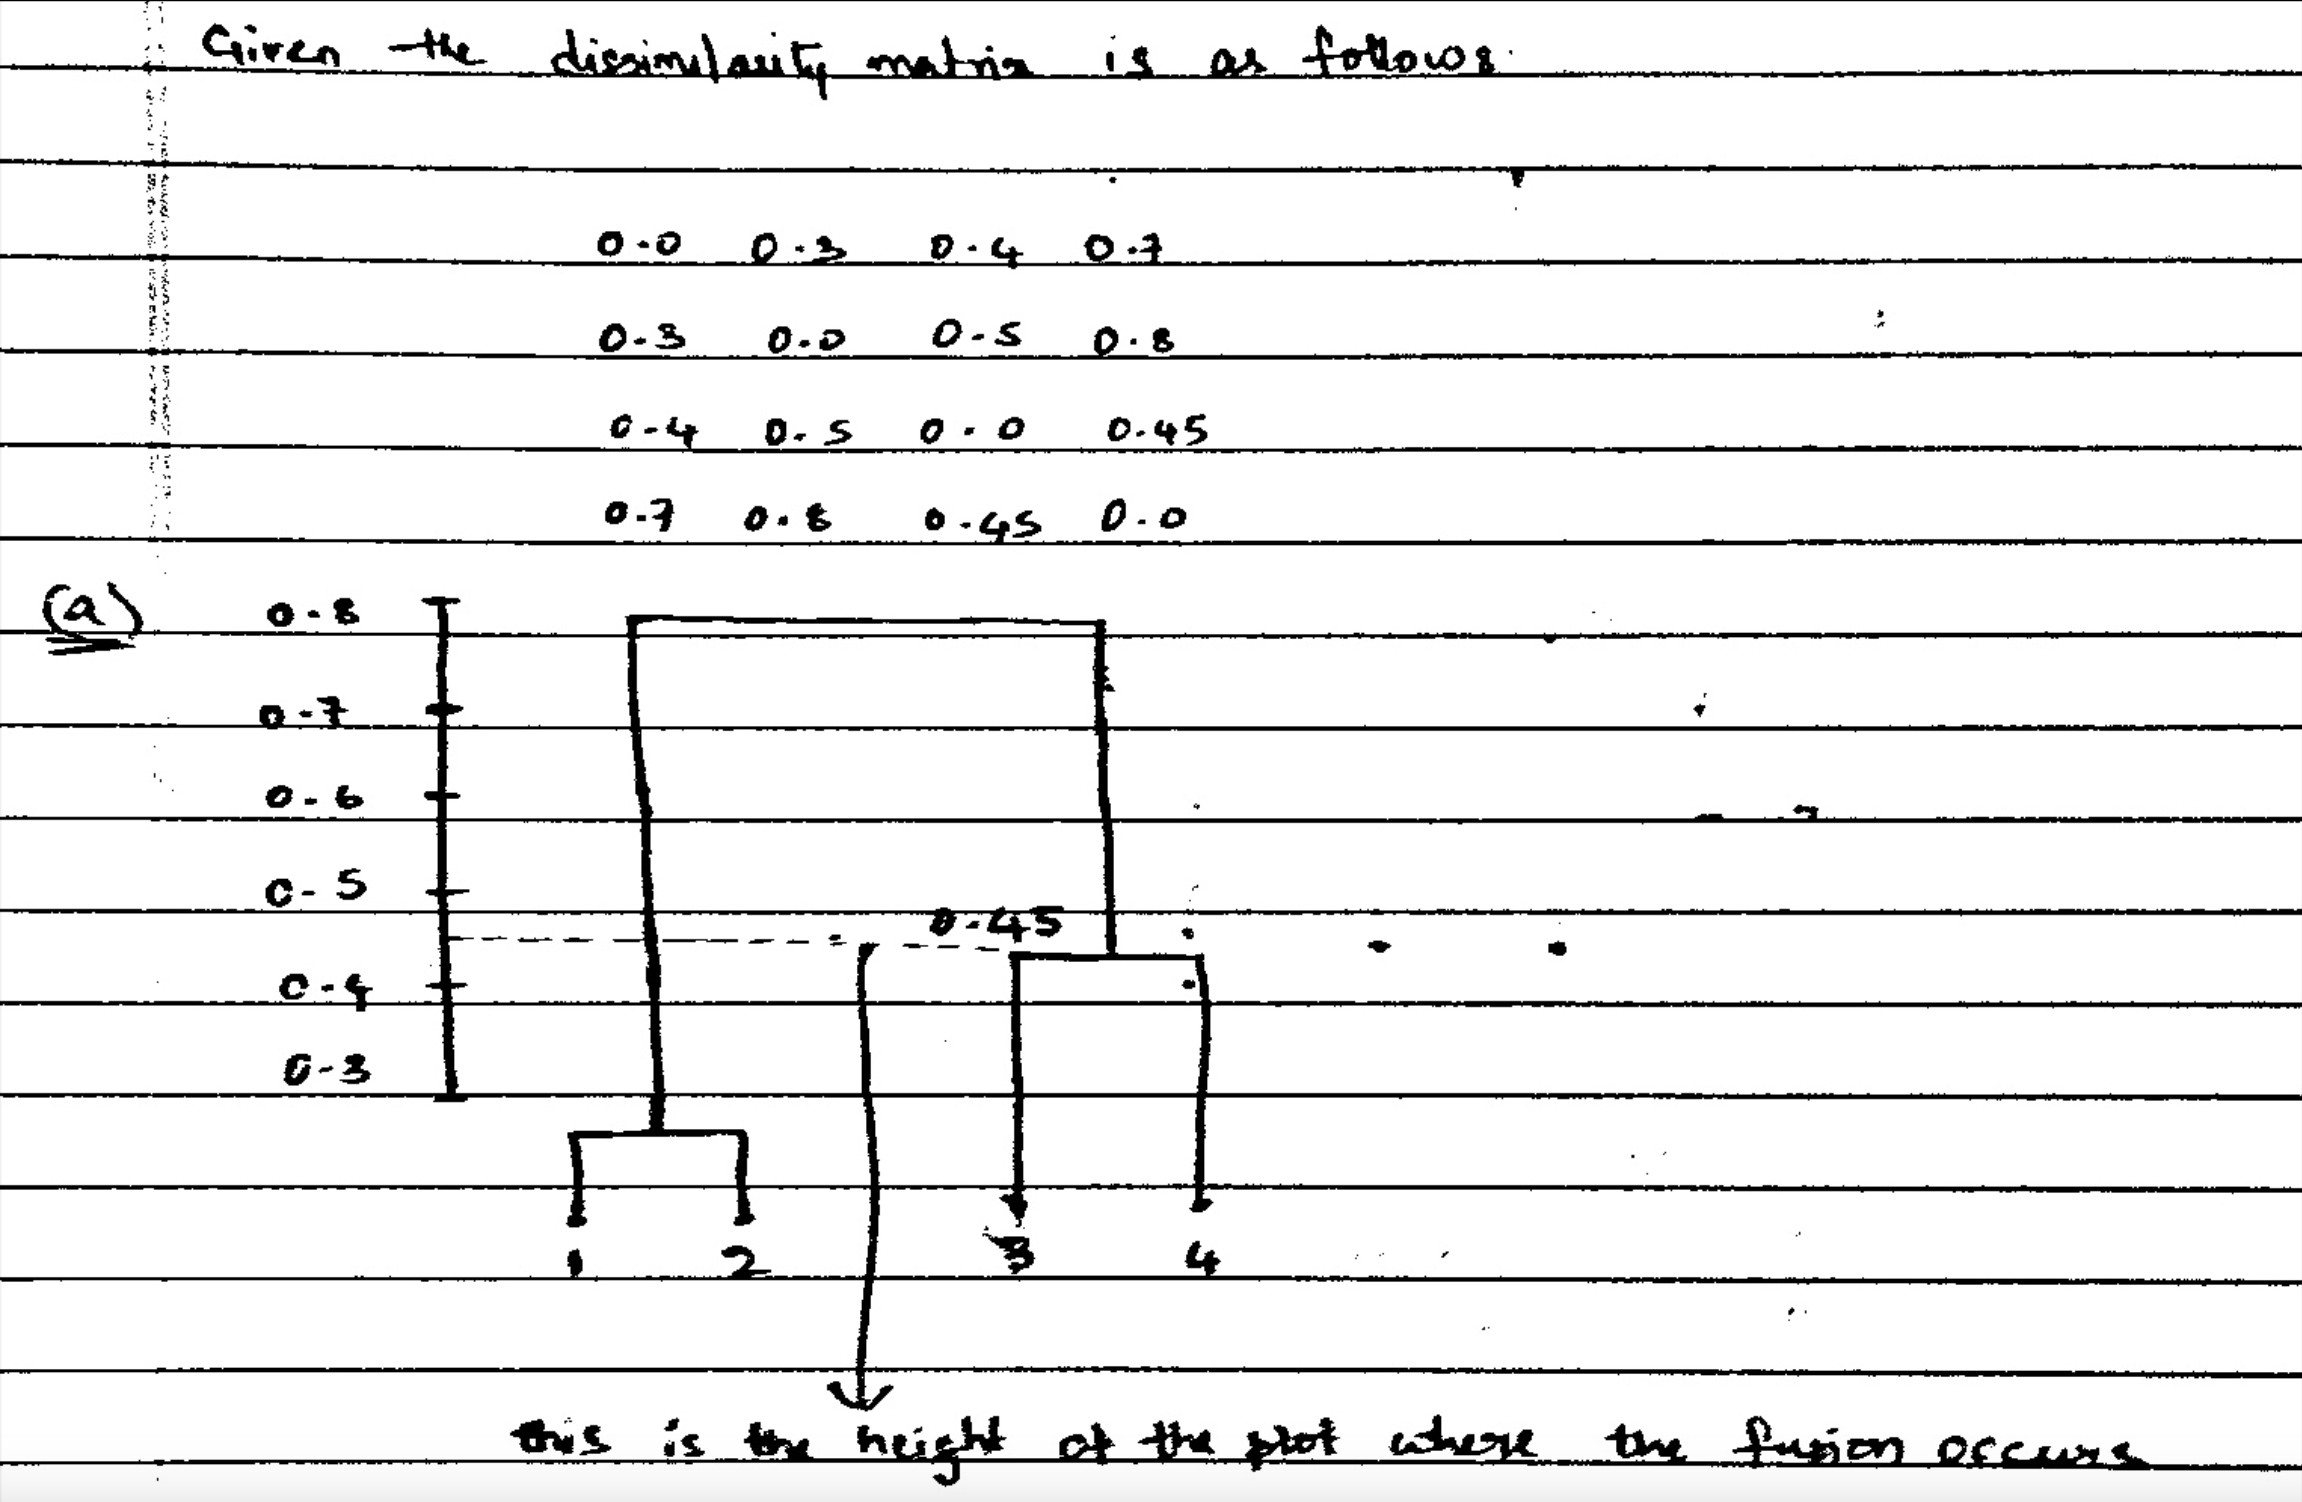

In [49]:
image_path = './12.6.2.(a).png'
image = Image.open(image_path)
display(image)

## 12.6.2.(b)

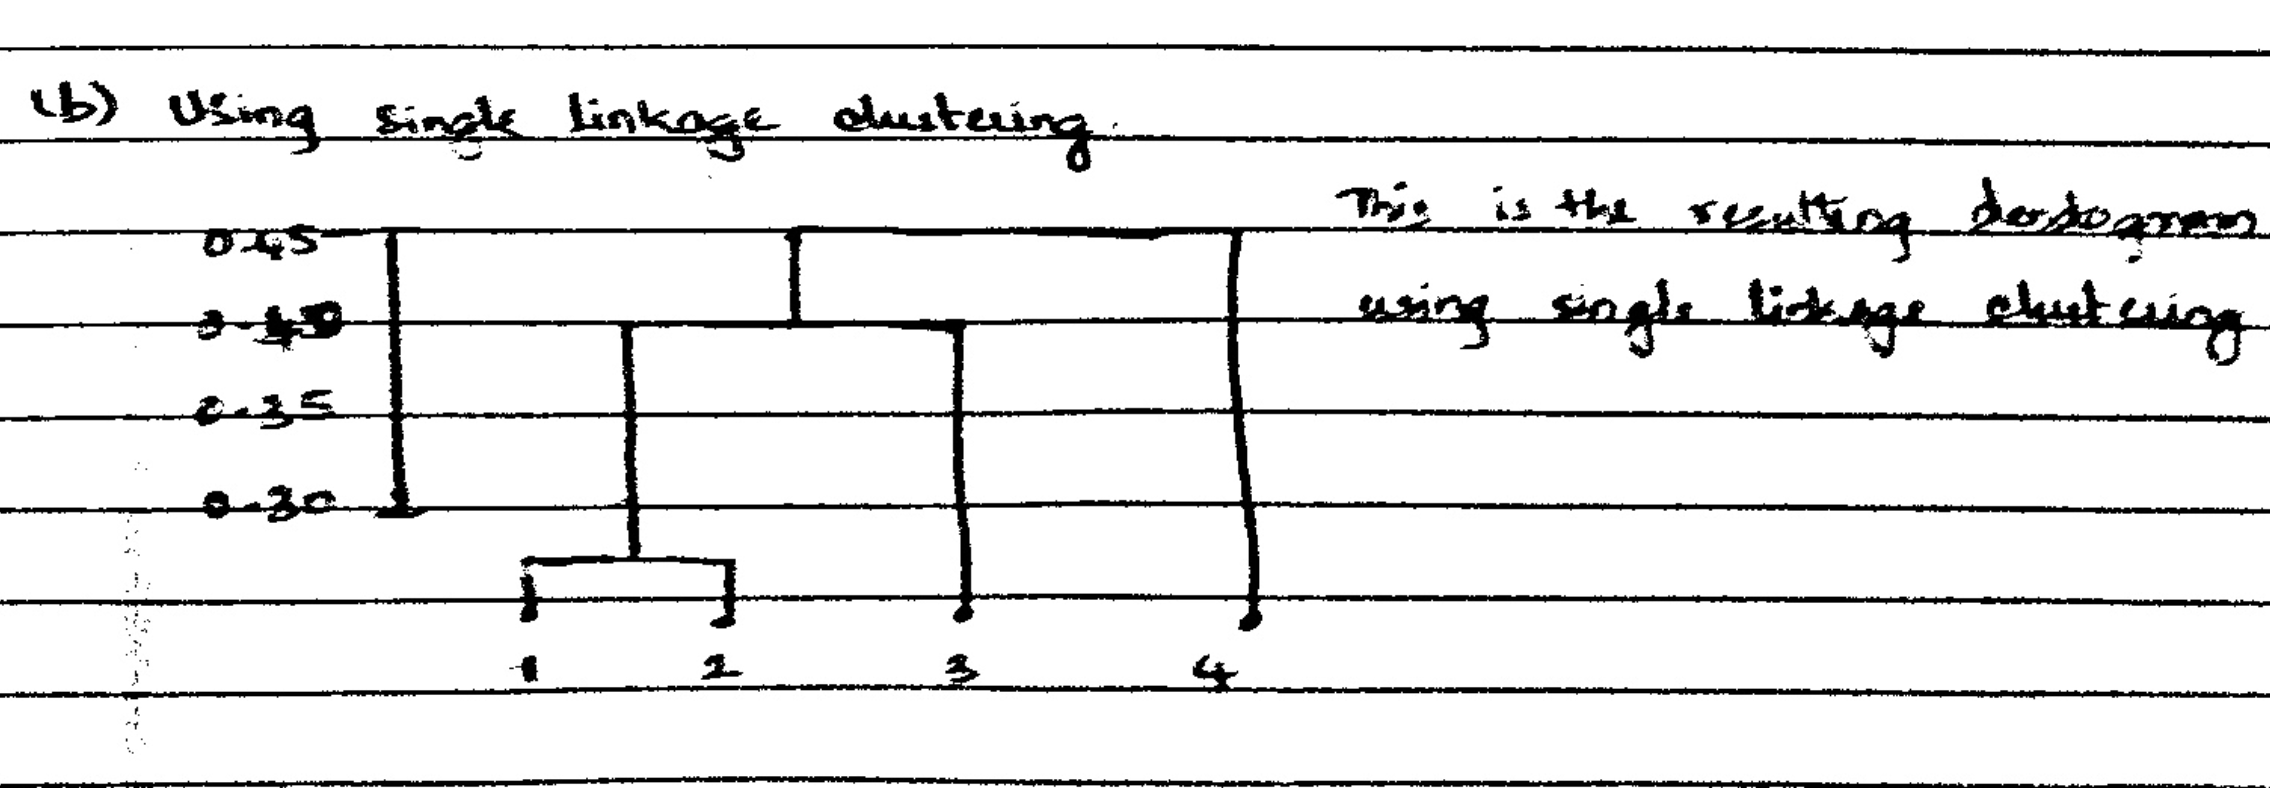

In [50]:
image_path = './12.6.2.(b).png'
image = Image.open(image_path)
display(image)

## 12.6.2.(c)

The observations in the clusters are as follows:

{1, 2}
{3, 4}

## 12.6.2.(d)

The observations in the clusters are as follows:

{1, 2, 3}
{4}

## 12.6.2.(e)

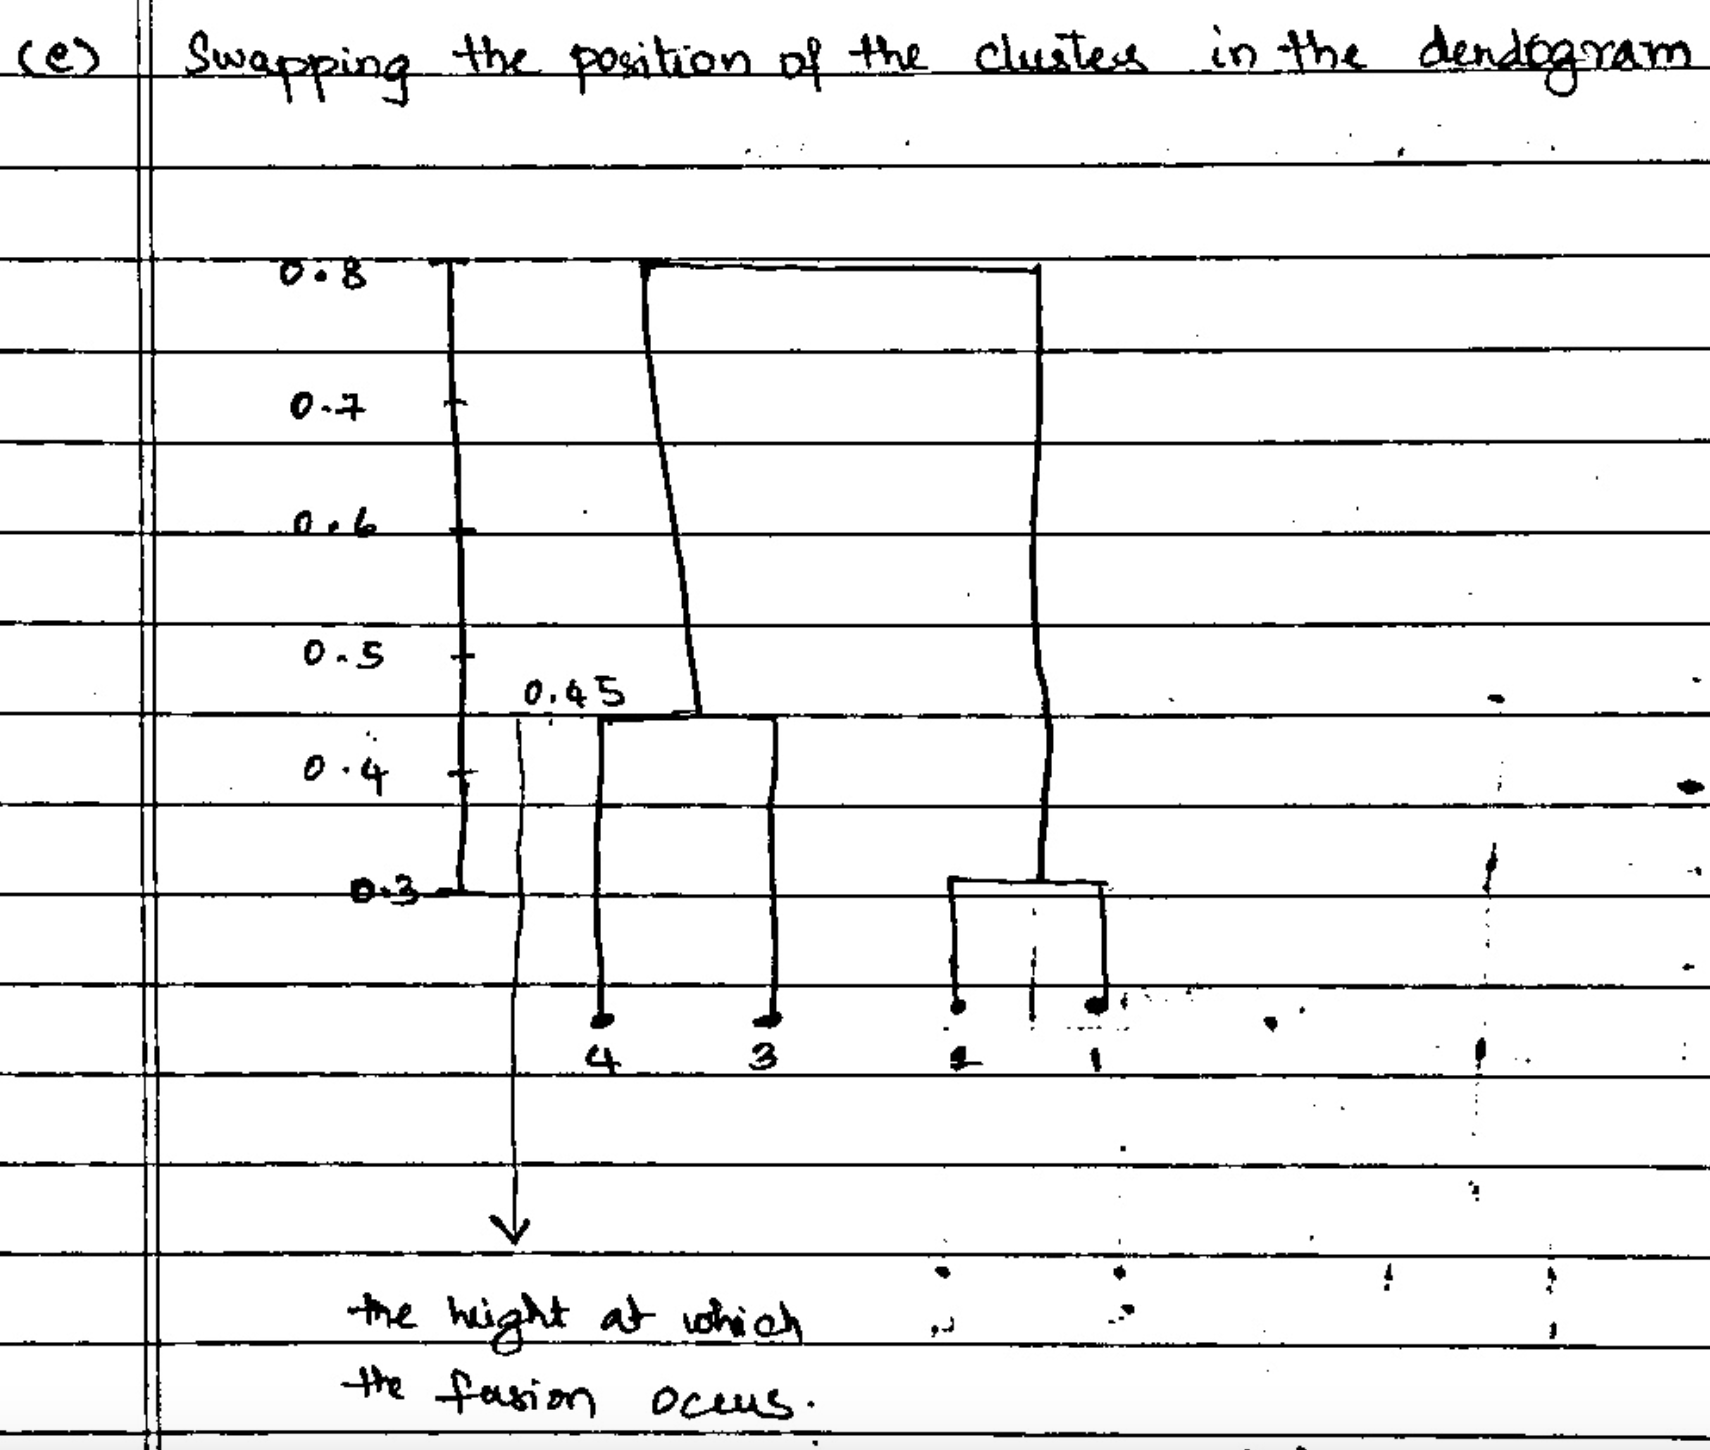

In [51]:
image_path = './12.6.2.(e).png'
image = Image.open(image_path)
display(image)